# **Data Collection**

## Objectives

* Answer business requirement 4:
    - Use clustering algorithms to identify patterns within the skin lesion images. Helping to understand characteristics commonly associated with benign or malignant conditions.

* Answer business requirement 5:
    - The project will deliver a web application where users can upload a skin lesion image, and the system will provide a diagnosis, a confidence level of the prediction, and an associated cluster.

* Answer business requirement 8:
    - The client is interested to have a study to visually differentiate between lesions.

## Inputs

* inputs/skin_cancer_dataset/sorted_images/train
* inputs/skin_cancer_dataset/sorted_images/test
* inputs/skin_cancer_dataset/sorted_images/validation

## Outputs

* Image shape embeddings pickle file.
* Mean and variability of images per label plot.
* Plot to distinguish the contrast between parasite-contained and uninfected cell images.
* Generate code that answers business requirement 1 and can be used to build an image montage on the Streamlit dashboard.

## Additional Comments

* No additional comments.


---

# Set Data Directory

## Import libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
sns.set_style("white")
from matplotlib.image import imread

# Change working directory

In [2]:
current_dir = os.getcwd()
current_dir

'/Users/danielhamilton/CI/project5/AI-DermDiagnosis/jupyter_notebooks'

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'/Users/danielhamilton/CI/project5/AI-DermDiagnosis'

## Set input directories

Set train, validation and test paths.

In [5]:
my_data_dir = 'inputs/skin_cancer_dataset/sorted_images'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

## Set output directory

In [7]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(current_dir) and version in os.listdir(current_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

## Set label names

In [8]:
# Set the labels
labels = os.listdir(train_path)
print('Label for the images are', labels)

Label for the images are ['akiec', 'df', 'bkl', 'vasc', 'nv', 'bcc', 'mel']


---

# Data visualisation of image data

---

## Image shape

### Compute average images size on train set.

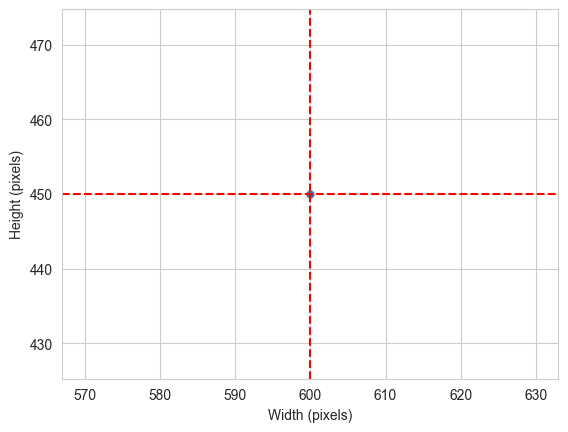

Width average: 600 
Height average: 450


In [9]:
dim1, dim2 = [], []
for label in labels:
    for image_filename in os.listdir(train_path + '/' + label):
        img = imread(train_path + '/' + label + '/' + image_filename)
        d1, d2, colors = img.shape
        dim1.append(d1)  # image height
        dim2.append(d2)  # image width

sns.set_style("whitegrid")
fig, axes = plt.subplots()
sns.scatterplot(x=dim2, y=dim1, alpha=0.2)
axes.set_xlabel("Width (pixels)")
axes.set_ylabel("Height (pixels)")
dim1_mean = int(np.array(dim1).mean())
dim2_mean = int(np.array(dim2).mean())
axes.axvline(x=dim2_mean, color='r', linestyle='--')
axes.axhline(y=dim1_mean, color='r', linestyle='--')
plt.show()
print(f"Width average: {dim2_mean} \nHeight average: {dim1_mean}")

### Histograms of dimensions

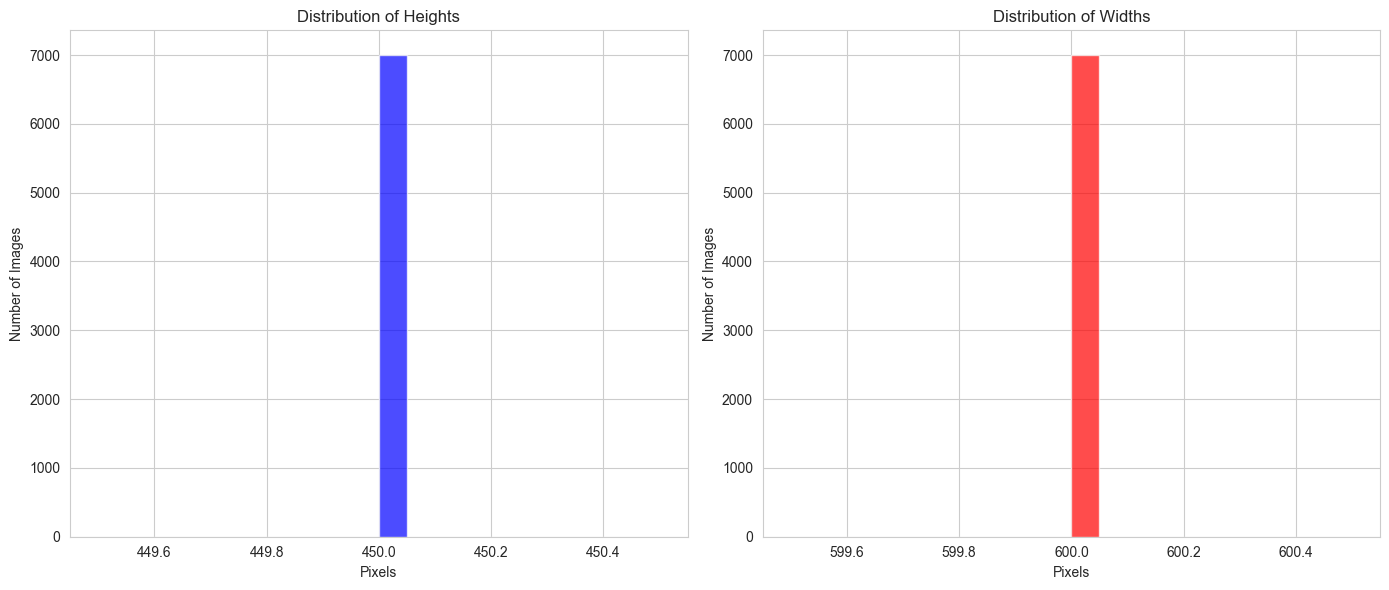

In [12]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.hist(dim1, bins=20, color='b', alpha=0.7)
plt.title('Distribution of Heights')
plt.xlabel('Pixels')
plt.ylabel('Number of Images')

plt.subplot(1,2,2)
plt.hist(dim2, bins=20, color='r', alpha=0.7)
plt.title('Distribution of Widths')
plt.xlabel('Pixels')
plt.ylabel('Number of Images')

plt.tight_layout()
plt.show()

Images size for training the model is the average from all images in the train set.

In [10]:
image_shape = (dim1_mean, dim2_mean, 3)
image_shape

(450, 600, 3)

Save the image shape embeddings

In [11]:
joblib.dump(value=image_shape ,
            filename=f"{file_path}/image_shape.pkl")

['outputs/v1/image_shape.pkl']

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---